In [40]:
import pandas as pd
from datetime import datetime
data_files = ['Bold_744H-10_31-11_07.csv', 'Courageous_729H-09_25-09_28.csv', 'Fearless_709H-10_31-11_07.csv', 'Gallant_102H-10_04-10_11.csv', 'Noble_4H-10_24-10_29.csv', 'Resolute_728H-10_14-10_21.csv', 'Ruthless_745H-10_01-10_08.csv', 'Steadfast_505H-10_30-11_07.csv', 'Valiant_505H-09_22-09_30.csv']

In [24]:
df = pd.read_csv('../eog-resources/data/' + data_files[0])
df['Time'] = df['Time'].transform(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))
df = df.ffill() # fill in missing values

In [25]:
# display all rows
pd.set_option('display.max_rows', None)
df[145:200]

hydrates = df[(df['Inj Gas Meter Volume Instantaneous'] < 10) & (df['Inj Gas Valve Percent Open'] > 90)]
hydrates

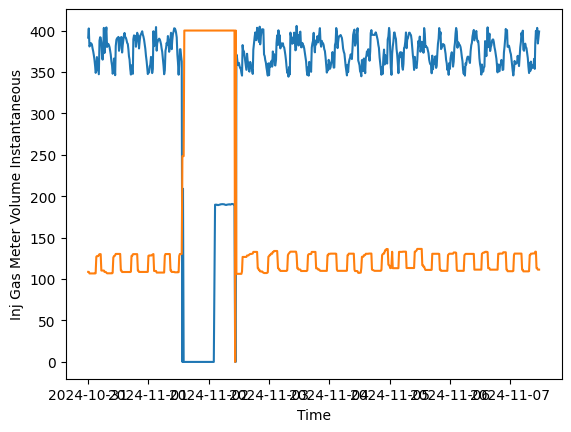

In [ ]:
# plot the time-series data
import matplotlib.pyplot as plt
# label the axes
plt.xlabel('Time')
plt.ylabel('Inj Gas Meter Volume Instantaneous')
plt.plot(df['Time'], df['Inj Gas Meter Volume Instantaneous'])
# also plot 'Inj Gas Valve Percent Open' on the same graph on a scale from 0 to 100
plt.plot(df['Time'], df['Inj Gas Valve Percent Open'] * 4)

plt.show()

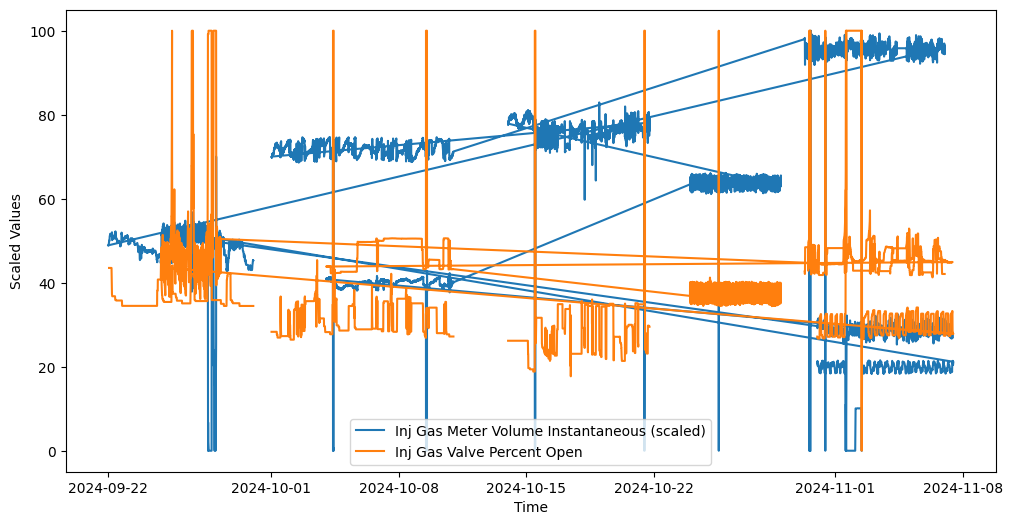

In [46]:
# For all the data files, plot graphs of the Inj Gas Meter Volume Instantaneous(scaled from 0 to max) and Inj Gas Valve Percent Open on the same graph (on a scale from 0 to 100).
# put them on ONE graph
combined_df = pd.DataFrame()

for data_file in data_files:
    df = pd.read_csv('../eog-resources/data/' + data_file)
    df['Time'] = df['Time'].transform(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))
    df = df.ffill() # fill in missing values
    combined_df = pd.concat([combined_df, df])

# Plot the combined dataframe
plt.figure(figsize=(12, 6))
plt.xlabel('Time')
plt.ylabel('Scaled Values')
plt.plot(combined_df['Time'], combined_df['Inj Gas Meter Volume Instantaneous'] / combined_df['Inj Gas Meter Volume Instantaneous'].max() * 100, label='Inj Gas Meter Volume Instantaneous (scaled)')
plt.plot(combined_df['Time'], combined_df['Inj Gas Valve Percent Open'], label='Inj Gas Valve Percent Open')
plt.legend()
plt.show()